# 포켓몬 속성 통계

1. [속성별 능력치 평균값 내기](#1.-속성별-능력치-평균값-내기)
    - 각 능력치를 속성별로 평균 내기
    - bar graph로 표시 (bar 색 속성 상징 색)


2. [능력치 분포도 표현](#2.-능력치-분포도-표현)
    - 각 능력치의 분포도 표현
    - histogram으로 표현 (포켓몬 이름 없이)
    
data set => https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

---

## 1. 속성별 능력치 평균값 내기

### 라이브러리 import

In [92]:
# numpy
import numpy as np

# pandas
import pandas as pd 

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 한글 폰트 설정

In [93]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


### data 로드

In [94]:
data = pd.read_csv("pokemon_data/pokemon_data.csv")
data.head()

,Unnamed: 0,name,pokedex_number,status,type_number,type_1,type_2,height_m,weight_kg,total_points,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,이상해씨,1,노말,2,풀,독,0.7,6.9,318,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,이상해풀,2,노말,2,풀,독,1.0,13.0,405,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,이상해꽃,3,노말,2,풀,독,2.0,100.0,525,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,파이리,4,노말,1,불꽃,NaN,0.6,8.5,309,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,4,리자드,5,노말,1,불꽃,NaN,1.1,19.0,405,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [95]:
data.shape

(151, 34)

### data 확인

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        151 non-null    int64  
 1   name              151 non-null    object 
 2   pokedex_number    151 non-null    int64  
 3   status            151 non-null    object 
 4   type_number       151 non-null    int64  
 5   type_1            151 non-null    object 
 6   type_2            67 non-null     object 
 7   height_m          151 non-null    float64
 8   weight_kg         151 non-null    float64
 9   total_points      151 non-null    int64  
 10  hp                151 non-null    int64  
 11  attack            151 non-null    int64  
 12  defense           151 non-null    int64  
 13  sp_attack         151 non-null    int64  
 14  sp_defense        151 non-null    int64  
 15  speed             151 non-null    int64  
 16  against_normal    151 non-null    float64
 1

In [97]:
data.type_1.unique()

array(['풀', '불꽃', '물', '벌레', '노말', '독', '전기', '땅', '페어리', '격투', '에스퍼',
       '바위', '고스트', '얼음', '드래곤'], dtype=object)

In [98]:
data.type_2.unique()

array(['독', nan, '비행', '땅', '페어리', '풀', '격투', '에스퍼', '강철', '얼음', '바위',
       '물'], dtype=object)

### data 전처리

In [99]:
data.columns[16:]

Index(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

In [100]:
data_drop_against = data.drop(data.columns[16:], axis=1)
data_drop_against.head()

,Unnamed: 0,name,pokedex_number,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,0,이상해씨,1,노말,2,풀,독,0.7,6.9,318,45,49,49,65,65,45
1,1,이상해풀,2,노말,2,풀,독,1.0,13.0,405,60,62,63,80,80,60
2,2,이상해꽃,3,노말,2,풀,독,2.0,100.0,525,80,82,83,100,100,80
3,3,파이리,4,노말,1,불꽃,NaN,0.6,8.5,309,39,52,43,60,50,65
4,4,리자드,5,노말,1,불꽃,NaN,1.1,19.0,405,58,64,58,80,65,80


### 속성 평균값으로 그룹화

In [101]:
data_type_mean = data_drop_against.groupby('type_1').mean().reset_index()
data_type_mean.head()

,type_1,Unnamed: 0,pokedex_number,type_number,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,격투,74.285714,75.285714,1.000000,1.185714,54.285714,412.142857,63.571429,102.857143,61.000000,45.000000,73.571429,66.142857
1,고스트,92.000000,93.000000,2.000000,1.466667,13.566667,405.000000,45.000000,50.000000,45.000000,115.000000,55.000000,95.000000
2,노말,70.727273,71.727273,1.454545,0.986364,50.086364,382.000000,78.681818,68.863636,53.545455,51.272727,59.863636,69.772727
3,독,50.071429,51.071429,1.285714,1.221429,27.314286,384.214286,64.500000,75.142857,67.000000,57.142857,61.642857,58.785714
4,드래곤,147.000000,148.000000,1.333333,2.666667,76.600000,440.000000,64.333333,94.000000,68.333333,73.333333,73.333333,66.666667



### 속셩 평균값 비교 시각화

In [102]:
data_type_mean.type_1

0      격투
1     고스트
2      노말
3       독
4     드래곤
5       땅
6       물
7      바위
8      벌레
9      불꽃
10     얼음
11    에스퍼
12     전기
13    페어리
14      풀
Name: type_1, dtype: object

In [227]:
## 속성에 맞는 속성 색 칼럼 추가(plot 표현 시 사용)

data_type_mean['type_1_color'] = ['#C22E28','#735797','#A8A77A','#A33EA1','#6F35FC','#E2BF65','#6390F0',
                                  '#B6A136','#A6B91A','#EE8130','#96D9D6','#F95587','#F7D02C','#D685AD','#7AC74C']
data_type_mean['type_1_color']

12    #C22E28
1     #735797
11    #A8A77A
10    #A33EA1
9     #6F35FC
2     #E2BF65
6     #6390F0
4     #B6A136
0     #A6B91A
3     #EE8130
7     #96D9D6
5     #F95587
8     #F7D02C
14    #D685AD
13    #7AC74C
Name: type_1_color, dtype: object

In [104]:
# 카럶 확인
data_type_mean.columns

Index(['type_1', 'Unnamed: 0', 'pokedex_number', 'type_number', 'height_m',
       'weight_kg', 'total_points', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'type_1_color'],
      dtype='object')

Text(0.5, 1.0, '속성별 키 비교')

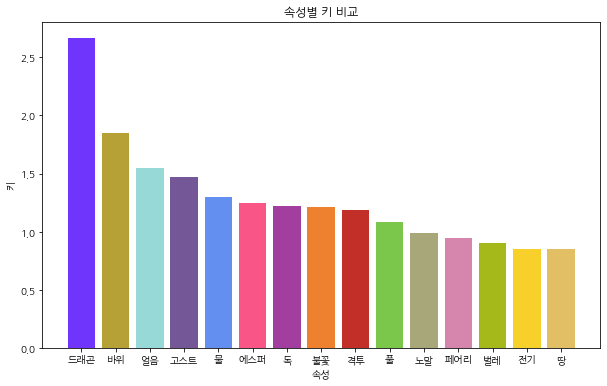

In [105]:
# 키

data_type_mean = data_type_mean.sort_values('height_m', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'height_m', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('키')
plt.title('속성별 키 비교')

Text(0.5, 1.0, '속성별 몸무게 비교')

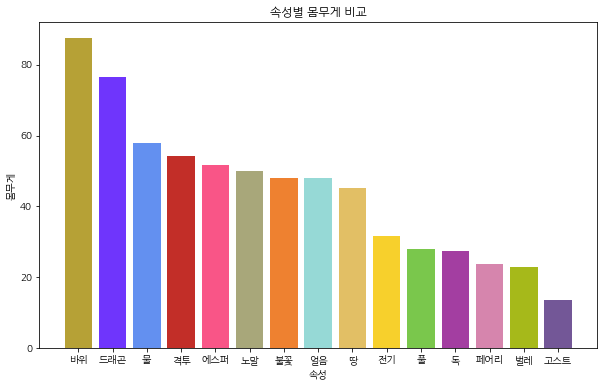

In [106]:
# 몸무게

data_type_mean = data_type_mean.sort_values('weight_kg', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'weight_kg', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('몸무게')
plt.title('속성별 몸무게 비교')

Text(0.5, 1.0, '속성별 총 능력치 비교')

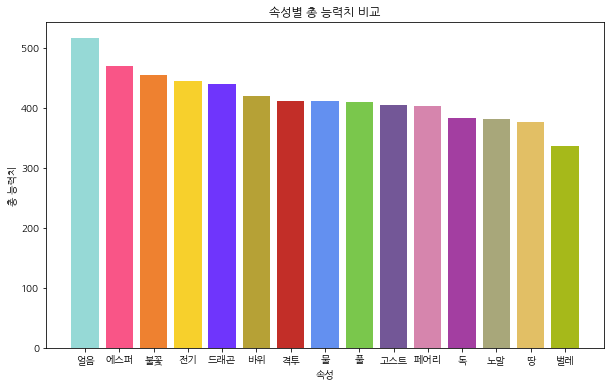

In [107]:
# 총 능력치

data_type_mean = data_type_mean.sort_values('total_points', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'total_points', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('총 능력치')
plt.title('속성별 총 능력치 비교')

Text(0.5, 1.0, '속성별 HP 비교')

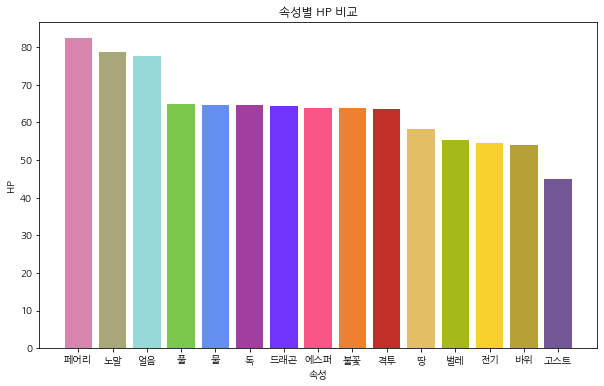

In [108]:
# HP

data_type_mean = data_type_mean.sort_values('hp', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'hp', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('HP')
plt.title('속성별 HP 비교')

Text(0.5, 1.0, '속성별 공격력 비교')

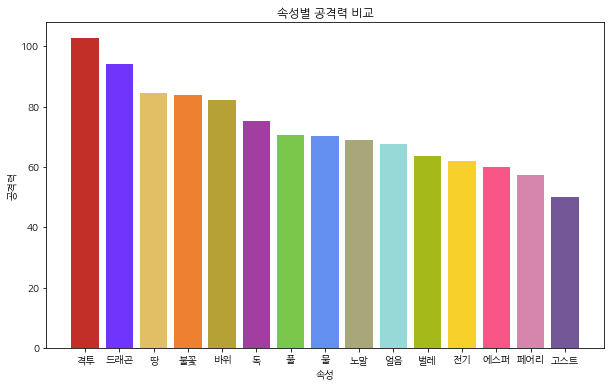

In [109]:
# 공격력

data_type_mean = data_type_mean.sort_values('attack', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'attack', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('공격력')
plt.title('속성별 공격력 비교')

Text(0.5, 1.0, '속성별 방어력 비교')

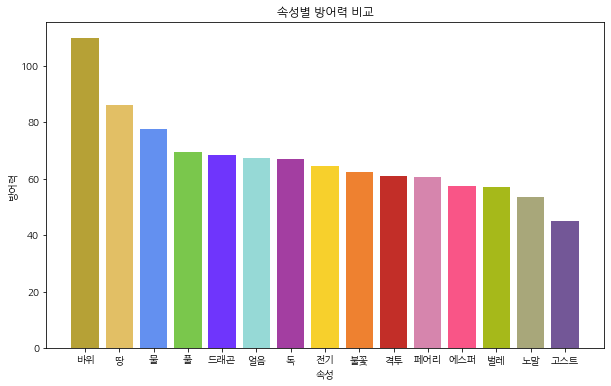

In [110]:
# 방어력

data_type_mean = data_type_mean.sort_values('defense', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'defense', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('방어력')
plt.title('속성별 방어력 비교')

Text(0.5, 1.0, '속성별 특수 공격력 비교')

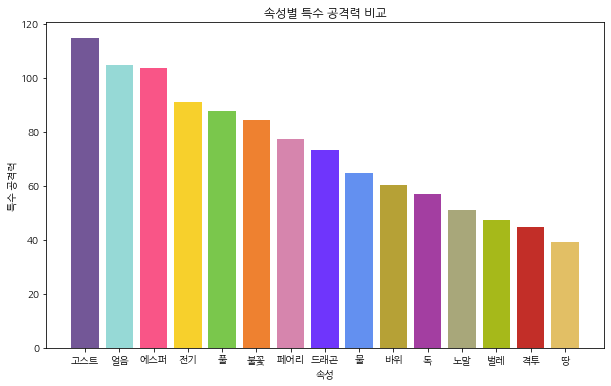

In [111]:
# 특수 공격력

data_type_mean = data_type_mean.sort_values('sp_attack', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'sp_attack', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('특수 공격력')
plt.title('속성별 특수 공격력 비교')

Text(0.5, 1.0, '속성별 특수 방어력 비교')

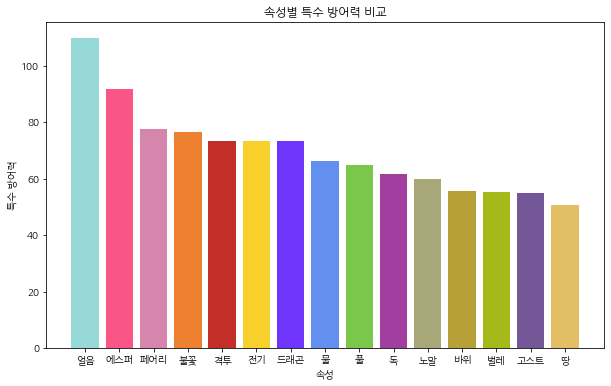

In [112]:
# 특수 방어력

data_type_mean = data_type_mean.sort_values('sp_defense', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'sp_defense', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('특수 방어력')
plt.title('속성별 특수 방어력 비교')

Text(0.5, 1.0, '속성별 민첩성 비교')

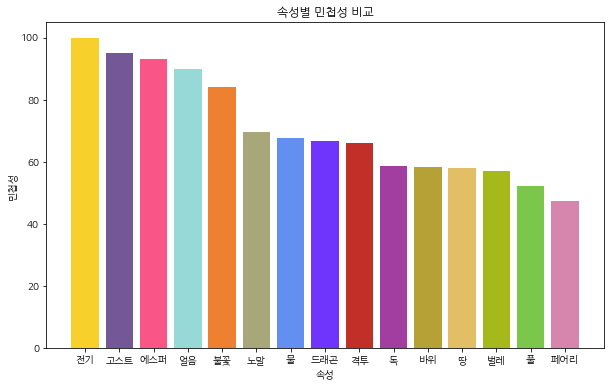

In [113]:
# 순발력

data_type_mean = data_type_mean.sort_values('speed', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar('type_1', 'speed', data=data_type_mean, color=data_type_mean.type_1_color)
plt.xlabel('속성')
plt.ylabel('민첩성')
plt.title('속성별 민첩성 비교')

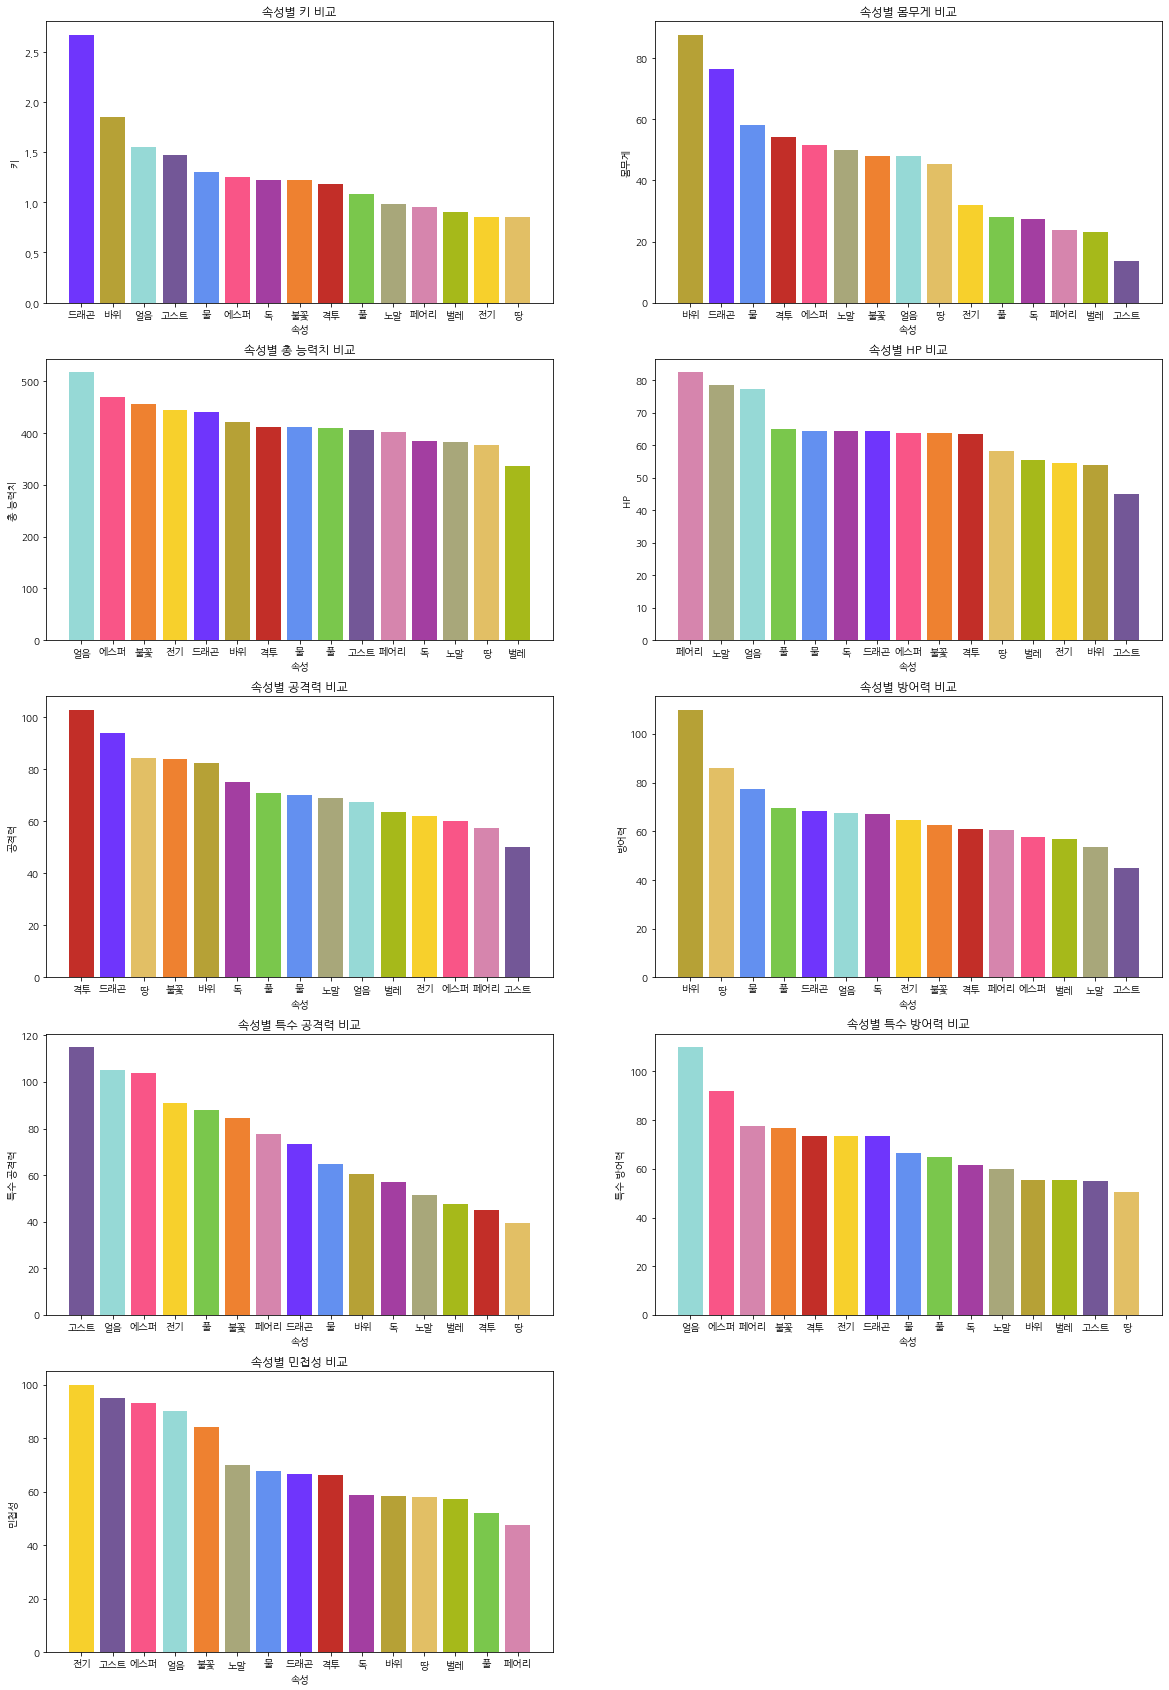

In [125]:
# 한 번에 보기

colums_kor = ['키', '몸무게', '총 능력치', 'HP', '공격력', '방어력', '특수 공격력', '특수 방어력', '민첩성']

plt.figure(figsize=(20, 30))

for i, col in enumerate(list(data_type_mean.columns)[4:-1]):
    data_type_mean = data_type_mean.sort_values(col, ascending=False)
    
    plt.subplot(5,2,i+1)
    plt.bar('type_1', data_type_mean[col], data=data_type_mean, color=data_type_mean.type_1_color)
    plt.xlabel('속성')
    plt.ylabel(colums_kor[i])
    plt.title('속성별 '+ colums_kor[i] +' 비교')

---

## 2. 능력치 분포도 표현

In [159]:
data.columns

Index(['Unnamed: 0', 'name', 'pokedex_number', 'status', 'type_number',
       'type_1', 'type_2', 'height_m', 'weight_kg', 'total_points', 'hp',
       'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Text(0.5, 1.0, '포켓몬 키 분포도')

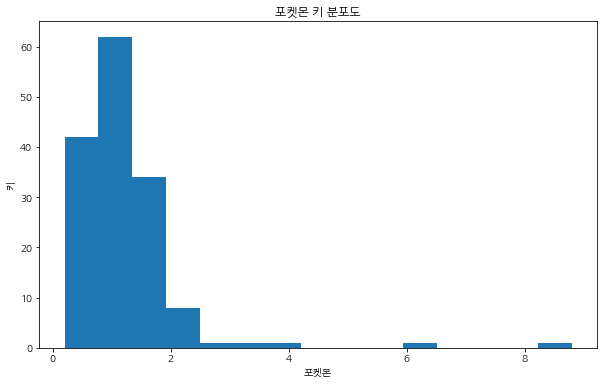

In [193]:
plt.figure(figsize=(10, 6))

plt.hist(data['height_m'], bins=15)
plt.xlabel('포켓몬')
plt.ylabel('키')
plt.title('포켓몬 키 분포도')

Text(0.5, 1.0, '포켓몬 몸무게 분포도')

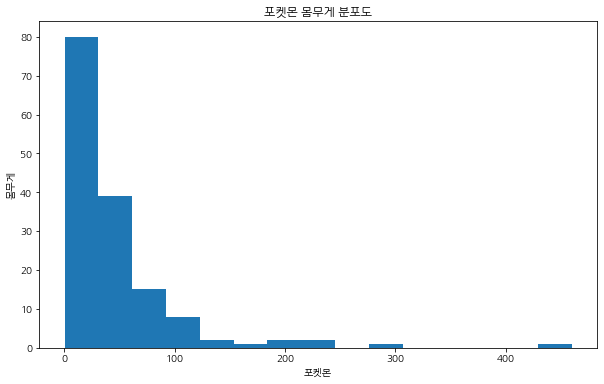

In [197]:
plt.figure(figsize=(10, 6))

plt.hist(data['weight_kg'], bins=15)
plt.xlabel('포켓몬')
plt.ylabel('몸무게')
plt.title('포켓몬 몸무게 분포도')

Text(0.5, 1.0, '포켓몬 HP 분포도')

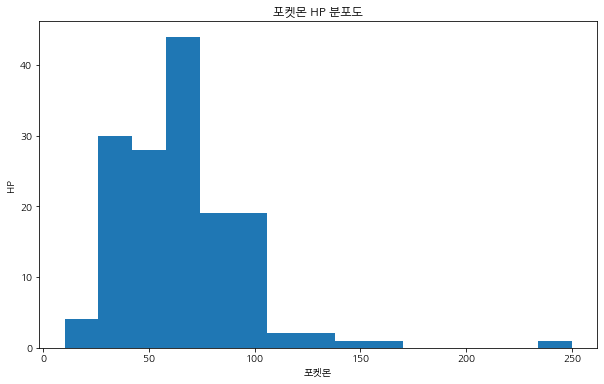

In [206]:
plt.figure(figsize=(10, 6))

plt.hist(data['hp'], bins=15, label='hp')
plt.xlabel('포켓몬')
plt.ylabel('HP')
plt.title('포켓몬 HP 분포도')

Text(0.5, 1.0, '포켓몬 총 능력치 분포도')

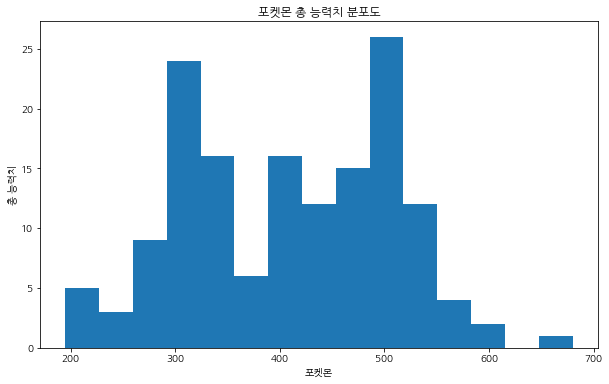

In [208]:
plt.figure(figsize=(10, 6))

plt.hist(data['total_points'], bins=15, label='total_points')
plt.xlabel('포켓몬')
plt.ylabel('총 능력치')
plt.title('포켓몬 총 능력치 분포도')

Text(0.5, 1.0, '포켓몬 공격력 분포도')

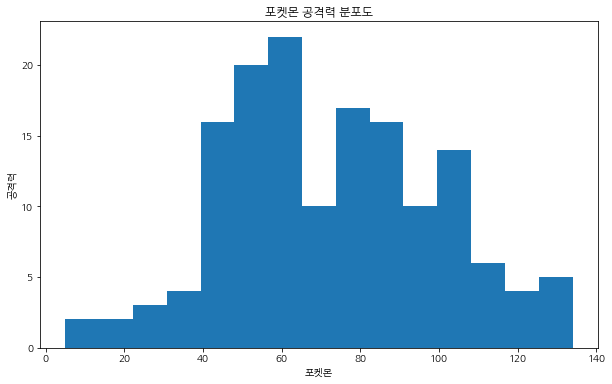

In [209]:
plt.figure(figsize=(10, 6))

plt.hist(data['attack'], bins=15, label='attack')
plt.xlabel('포켓몬')
plt.ylabel('공격력')
plt.title('포켓몬 공격력 분포도')

Text(0.5, 1.0, '포켓몬 방어력 분포도')

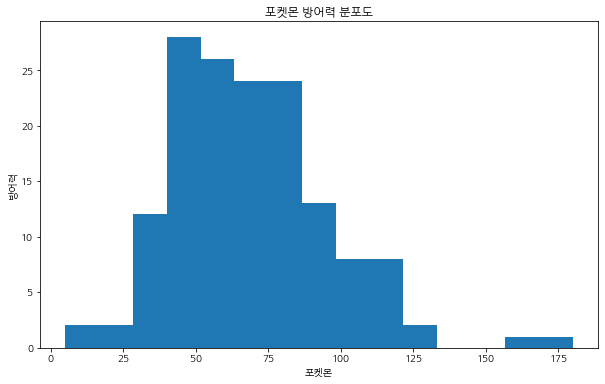

In [211]:
plt.figure(figsize=(10, 6))

plt.hist(data['defense'], bins=15, label='defense')
plt.xlabel('포켓몬')
plt.ylabel('방어력')
plt.title('포켓몬 방어력 분포도')

Text(0.5, 1.0, '포켓몬 특수 공격력 분포도')

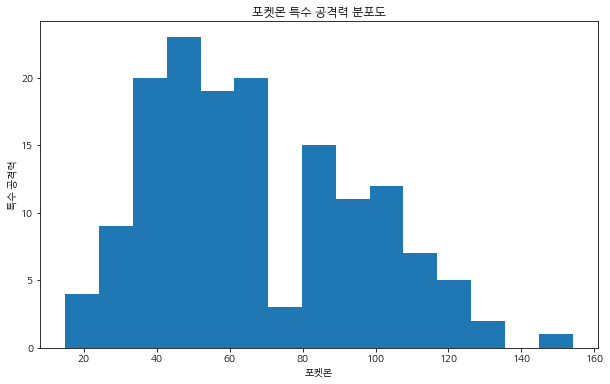

In [212]:
plt.figure(figsize=(10, 6))

plt.hist(data['sp_attack'], bins=15, label='sp_attack')
plt.xlabel('포켓몬')
plt.ylabel('특수 공격력')
plt.title('포켓몬 특수 공격력 분포도')

Text(0.5, 1.0, '포켓몬 특수 방어력 분포도')

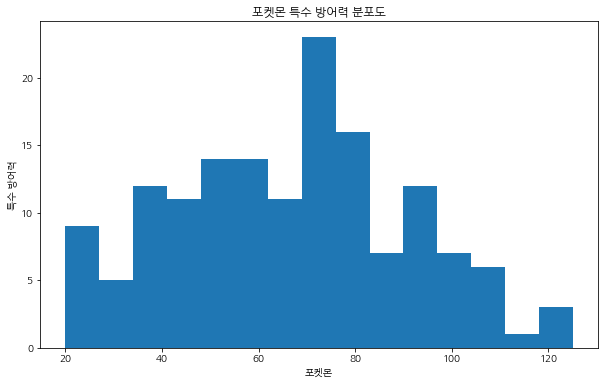

In [213]:
plt.figure(figsize=(10, 6))

plt.hist(data['sp_defense'], bins=15, label='sp_defense')
plt.xlabel('포켓몬')
plt.ylabel('특수 방어력')
plt.title('포켓몬 특수 방어력 분포도')

Text(0.5, 1.0, '포켓몬 민첩성 분포도')

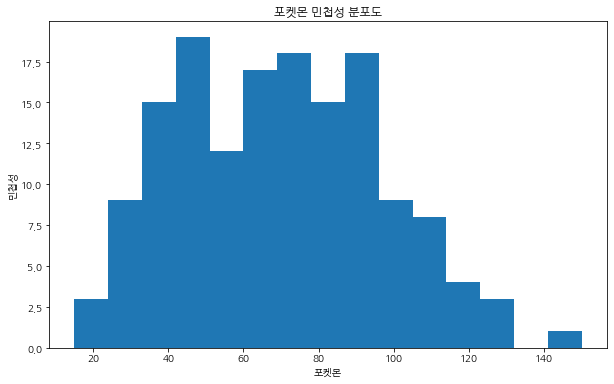

In [214]:
plt.figure(figsize=(10, 6))

plt.hist(data['speed'], bins=15, label='speed')
plt.xlabel('포켓몬')
plt.ylabel('민첩성')
plt.title('포켓몬 민첩성 분포도')

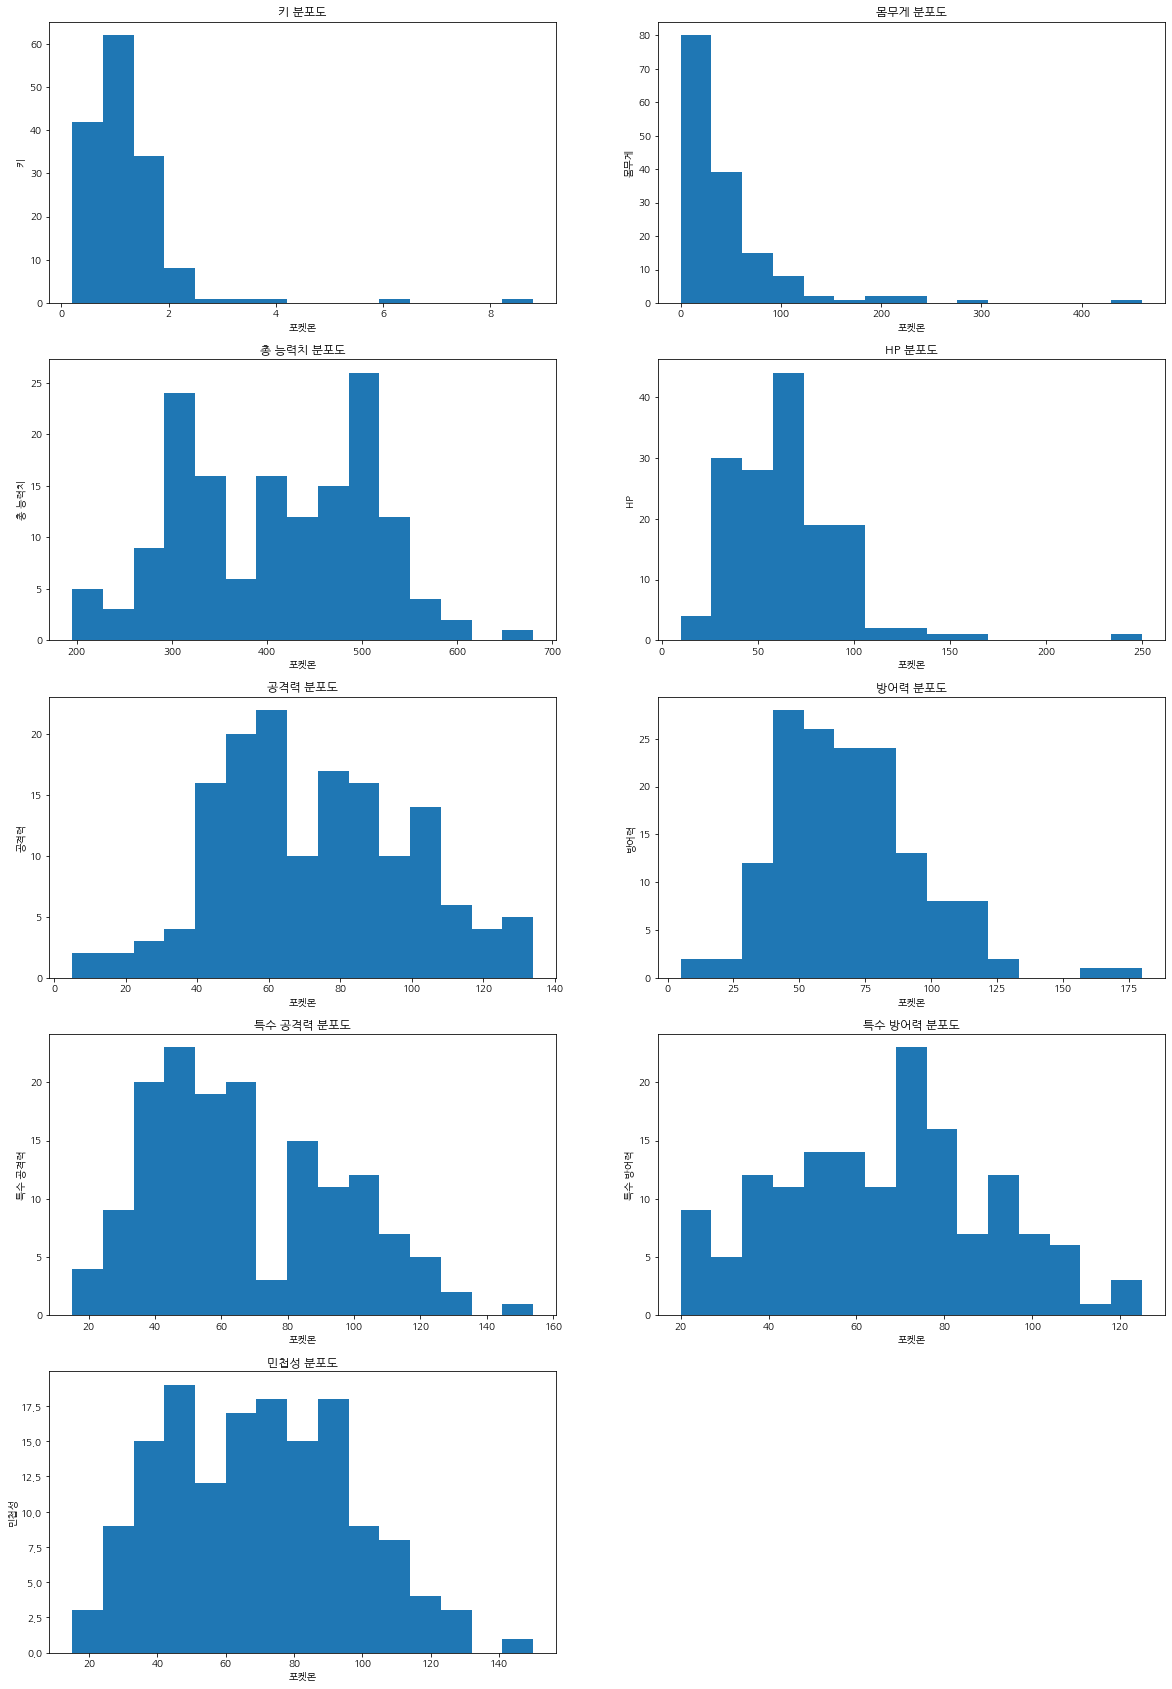

In [223]:
# 한 번에 보기

colums_kor = ['키', '몸무게', '총 능력치', 'HP', '공격력', '방어력', '특수 공격력', '특수 방어력', '민첩성']

plt.figure(figsize=(20, 30))

for i, col in enumerate(list(data.columns)[7:16]): 
    plt.subplot(5,2,i+1)
    plt.hist(data[col], bins=15,)
    plt.xlabel('포켓몬')
    plt.ylabel(colums_kor[i])
    plt.title(colums_kor[i]+' 분포도')